<a href="https://colab.research.google.com/github/kshitijain902/Machine_learning/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

In [2]:
x,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=100)

In [3]:
x.shape

(500, 2)

In [4]:
y.shape

(500,)

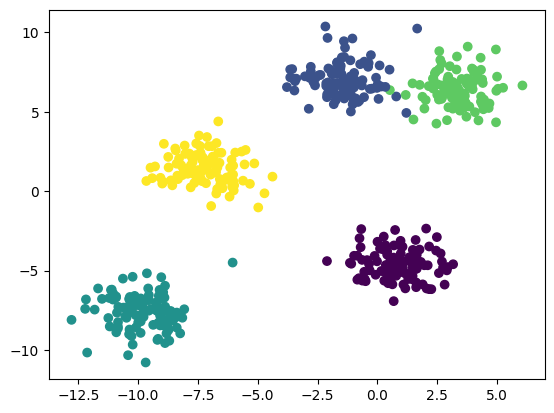

In [5]:
plt.scatter(x[:,0],x[:,1],c=y)

In [6]:
k=5
color=['green','red','blue','yellow','cyan']
clusters={}
for i in range(k):
  center=np.random.randint(-12,10,size=(2))
  point=[]
  cluster={
      'center':center,
      'point':point,
      'color':color[i]
  }
  clusters[i]=cluster



In [7]:
center

array([7, 5])

In [8]:
clusters

{0: {'center': array([7, 1]), 'point': [], 'color': 'green'},
 1: {'center': array([-5,  0]), 'point': [], 'color': 'red'},
 2: {'center': array([-6,  9]), 'point': [], 'color': 'blue'},
 3: {'center': array([ -5, -10]), 'point': [], 'color': 'yellow'},
 4: {'center': array([7, 5]), 'point': [], 'color': 'cyan'}}

In [16]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))


14.572143470315911


In [25]:
def assignPointToClusters(clusters): #E-Step
    for ix in range(x.shape[0]):
        dist = []
        curr_x = x[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)
        clusters[current_cluster]['point'].append(curr_x)


In [30]:
def updateClusters(clusters): # M-Step -> We update every cluster center according to the mean of the points in it
    for kx in range(k):
        pts = np.array(clusters[kx]['point'])

        if pts.shape[0]>0: #If a cluster has some-nonzero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['point'] = [] #Clear the list


In [31]:
def plotClusters(clusters):

    for kx in range(k):
        #print(len(clusters[kx]['points']))

        pts = np.array(clusters[kx]['point'])
        #print(pts.shape)

        #Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass

        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")

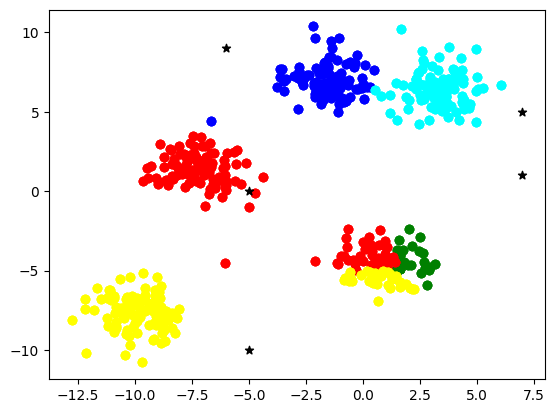

In [32]:
assignPointToClusters(clusters)
plotClusters(clusters)

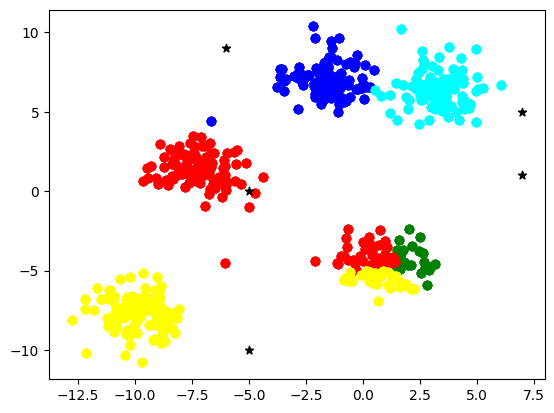

In [33]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)
